# EDA Airbnb
## Construção de Mapa Iterativo

In [ ]:
#bibliotecas
import pandas as pd
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#statistics lib
from scipy import stats

In [ ]:
## ref - https://pythonguides.com/what-is-matplotlib-inline/
%matplotlib inline

In [ ]:
## Carregamento de Dados
airbnb_url = 'https://raw.githubusercontent.com/ManarOmar/New-York-Airbnb-2019/master/AB_NYC_2019.csv'
airbnb_ori = pd.read_csv(airbnb_url)

In [ ]:
print(f"Quantidade de colunas: {airbnb_ori.shape[1]}")
print(f"Quantidade de linhas: {airbnb_ori.shape[0]}")

Quantidade de colunas: 16
Quantidade de linhas: 48895


In [ ]:
print("Nome das colunas:")
for col in airbnb_ori.columns:
  print(col)

Nome das colunas:
id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365


In [ ]:
print("Principais dados matemáticos: \n")
airbnb_ori.describe()

Principais dados matemáticos: 



id  ...  availability_365
count  4.889500e+04  ...      48895.000000
mean   1.901714e+07  ...        112.781327
std    1.098311e+07  ...        131.622289
min    2.539000e+03  ...          0.000000
25%    9.471945e+06  ...          0.000000
50%    1.967728e+07  ...         45.000000
75%    2.915218e+07  ...        227.000000
max    3.648724e+07  ...        365.000000

[8 rows x 10 columns]

In [ ]:
print("Tipo de dado de cada coluna: \n")
airbnb_ori.info()

Tipo de dado de cada coluna: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  l

In [ ]:
print("Primeiras linhas: \n")
airbnb_ori.head()

Primeiras linhas: 



id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]

In [ ]:
print("Verificando preenchimentos nulos: \n")
airbnb_ori.isna().sum()

Verificando preenchimentos nulos: 



id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
## Excluir a coluna id
airbnb_ori.drop(columns=['id'], inplace=True)

In [ ]:
## Excluindo as linhas no qual os preços dos locais estão zerados
airbnb_ori.drop(airbnb_ori[airbnb_ori['price']==0].index, inplace = True)

In [ ]:
## Conversão Data e Criação de campo ano
airbnb_ori['last_review'] = pd.to_datetime(airbnb_ori['last_review'])
airbnb_ori['year'] = airbnb_ori['last_review'].dt.year

In [ ]:
## Substituição dos campos NaN de name e host_name para 'Não informado' e de reviews per month por 0
airbnb_ori['name'].fillna('Não informado', inplace=True)
airbnb_ori['host_name'].fillna('Não informado', inplace=True)
airbnb_ori['reviews_per_month'].fillna(0, inplace=True)
airbnb_ori.isna().sum()

name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
year                              10052
dtype: int64

In [ ]:
## Para melhorar as análises, decidi retirar todas as residencias com preços acima de 1.000
airbnb_ori2 = airbnb_ori[airbnb_ori['price']<400]

## **Distribuição**

In [ ]:
sns.set_theme()

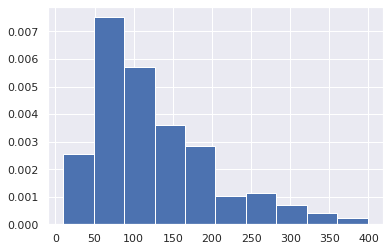

In [ ]:
airbnb_ori2.price.hist(bins=10, density=True);

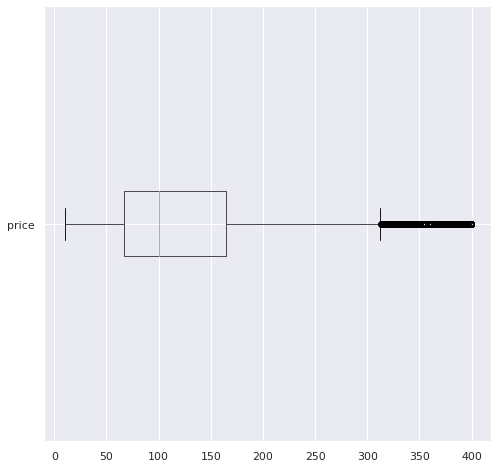

In [ ]:
## Podemos ver a distribuição de 3 formas:
plt.figure(figsize =(8,8))
airbnb_ori2.boxplot('price',vert=False)
# plt.hist(df.popularity, bins=10)
# plt.title('Histograma Popularidade')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


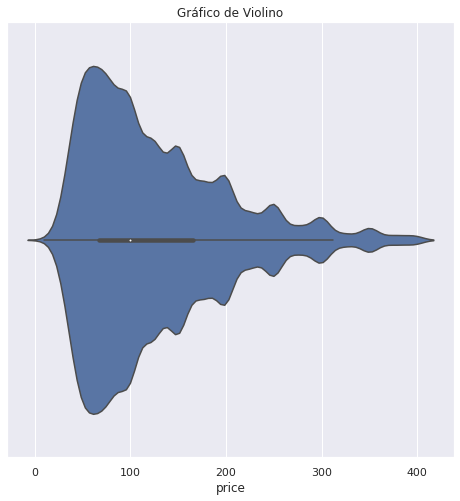

In [ ]:
plt.figure(figsize =(8,8))
sns.violinplot(airbnb_ori2.price)
plt.title('Gráfico de Violino')
plt.show()

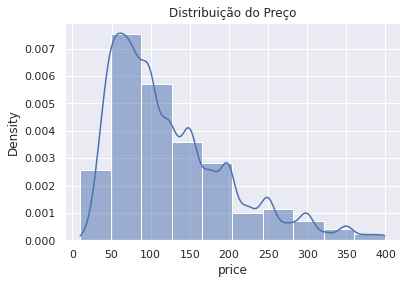

In [ ]:
sns.histplot(data=airbnb_ori2, x="price", bins=10,  stat="density", kde=True)
plt.title('Distribuição do Preço')
plt.show()

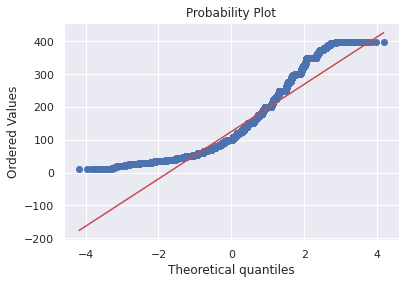

In [ ]:
## Este é uma curva normal que visualiza o percentil dos dados. 

## Teste QQPLOT
## Ref - https://data.library.virginia.edu/understanding-q-q-plots/
## Função scipy https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
res = stats.probplot(airbnb_ori2['price'], plot=plt)
plt.show()

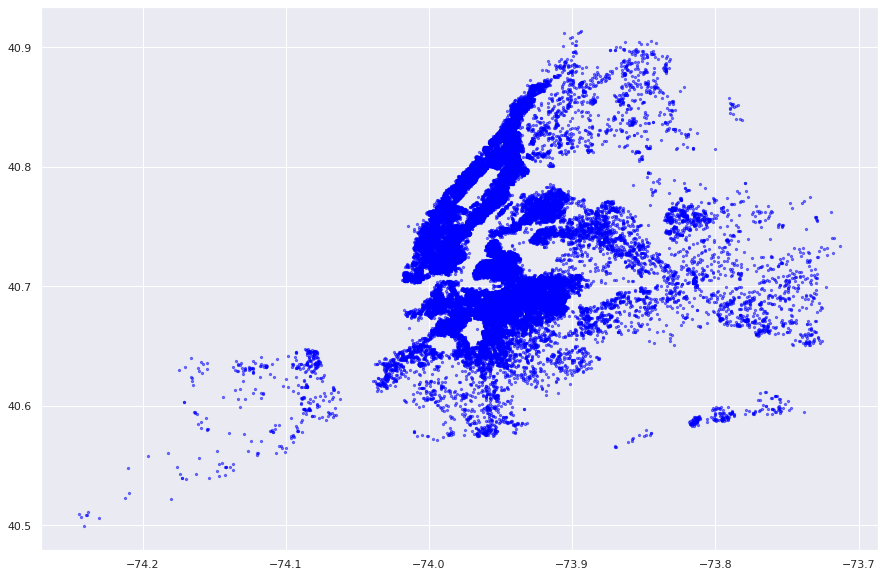

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(airbnb_ori2['longitude'].values, airbnb_ori2['latitude'].values, s=5, c='blue', alpha=0.5, zorder=5)

In [ ]:
fig = px.scatter_mapbox(airbnb_ori2, lat="latitude", 
                        lon="longitude", 
                        hover_name="name", 
                        hover_data=["host_name","price"], 
                        color="price",
                        zoom=9, height=550, width=1000, 
                        #animation_frame="price"
                        )
fig.update_layout(
    mapbox_style="carto-positron")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## **Análises**

In [ ]:
print("Os bairros que apresentam maior valor médio de aluguel com mais de uma residência para locação: \n")
airbnbf = airbnb_ori.groupby('neighbourhood')['price'].agg(['mean', 'count'])
airbnbf.where(airbnbf['count'] > 1).sort_values(by='mean', ascending=False).head(10)

Os bairros que apresentam maior valor médio de aluguel com mais de uma residência para locação: 



mean   count
neighbourhood                        
Tribeca            490.638418   177.0
Sea Gate           487.857143     7.0
Riverdale          442.090909    11.0
Prince's Bay       409.500000     4.0
Battery Park City  367.557143    70.0
Flatiron District  341.925000    80.0
Randall Manor      336.000000    19.0
NoHo               295.717949    78.0
SoHo               287.103352   358.0
Midtown            282.719094  1545.0